<a href="https://colab.research.google.com/github/aashmauprety/Emotion_Detection/blob/main/Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Download the dataset and unrar it

In [ ]:
!gdown --id 1cIo0FyHRItiobTsSJsJm8Fir1siMO55s
!unrar x Dataset.rar

#Loading all the required libraries

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import load_model

import glob
import matplotlib.pyplot as plt

#Building CNN

In [ ]:
model = Sequential()

model.add(Convolution2D(32, (3, 3), input_shape = (48,48,1),padding = 'same',activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding = 'same'))

model.add(Convolution2D(64, (3, 3),padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding = 'same'))

model.add(Convolution2D(128, (3, 3),padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding = 'same'))

model.add(Flatten())

model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dense(units = 7, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0

#Compiling the model

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

#Preparing the data

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

testing_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('Dataset/train',
                                                 target_size=(48, 48),
                                                 batch_size=32,
                                                 color_mode='grayscale',
                                                 class_mode='categorical')

validation_set = validation_datagen.flow_from_directory('Dataset/validation',
                                                target_size=(48, 48),
                                                batch_size=32,
                                                color_mode='grayscale',
                                                class_mode='categorical')


testing_set = testing_datagen.flow_from_directory('Dataset/test_set',
                                                target_size=(48, 48),
                                                color_mode='grayscale',
                                                )

Found 27869 images belonging to 7 classes.
Found 840 images belonging to 7 classes.
Found 0 images belonging to 0 classes.


#Training the model

In [ ]:
history = model.fit(training_set, validation_data=validation_set, epochs=200)

Saving the model and Plotting the results

In [ ]:
# Saving the model
model.save("model.hdf5")

In [ ]:
#Loading the model
model = load_model('model.hdf5', compile=False)

In [ ]:
train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]

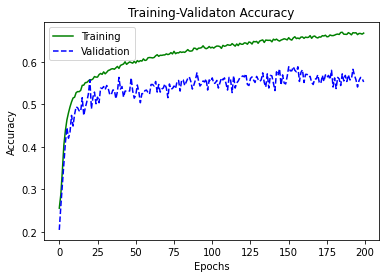

In [ ]:
epochs = np.arange(200)
plt.plot(epochs, train_acc, 'g', label = 'Training')
plt.plot(epochs, val_acc, '--b', label = 'Validation')
plt.title('Training-Validaton Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig(f'training_val_acc.png', dpi=150)
plt.show()

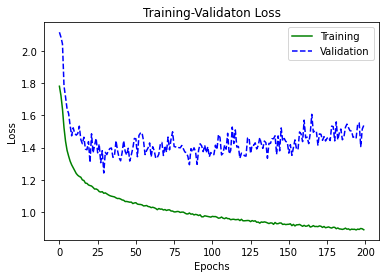

In [ ]:
epochs = np.arange(200)
plt.plot(epochs, train_loss, 'g', label = 'Training')
plt.plot(epochs, val_loss, '--b', label = 'Validation')
plt.title('Training-Validaton Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig(f'training_val_loss.png', dpi=150)
plt.show()

TESTING THE TRAINED MODEL

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Training_336818.jpg to Training_336818.jpg


In [ ]:
!unrar x t.rar

In [ ]:
filenames = glob.glob("test_set/*.jpg")
print(filenames)

['test_set/Training_336818.jpg', 'test_set/PrivateTest_1791924.jpg', 'test_set/PrivateTest_1221822.jpg', 'test_set/246365c4e7bd4439382590ef4a149e63.jpg', 'test_set/PrivateTest_10712253.jpg']


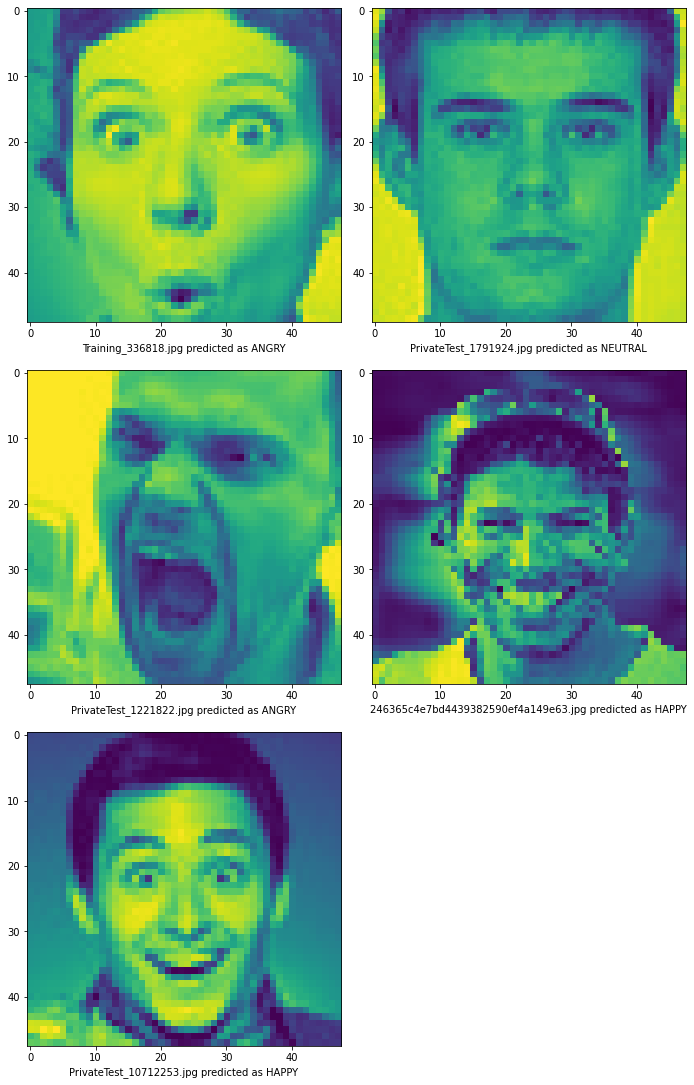

In [ ]:
output_classes = {0: 'angry', 1: 'disgust', 2:'fear', 3:'happy', 4:'neutral', 5:'sad', 6:'surprise'}
predictions = []

plt.figure(figsize=(10, 50))
for index, filename in enumerate(filenames):
  # Loading the Image
  original_image = image.load_img(filename, target_size=(48,48), color_mode='grayscale')


  # Converting the original image to array
  img = image.img_to_array(original_image)

  # Expanding the dimension of the image
  img = np.expand_dims(img, axis=0)


  # Making the predictions and flatteinng the result (Reducing the dimension)
  pred = model.predict(img).flatten()

  # Getting the binary label 0 or 1
  pred_clas = np.argmax(pred)

  # Getting the final category
  predicted_category = output_classes[pred_clas]

  # Plotting the images with their corresponding predictions
  plt.subplot(10, 2, index + 1)
  plt.imshow(original_image)
  plt.xlabel(f"{filename.split('/')[-1]} predicted as {predicted_category.upper()}")

plt.tight_layout()
plt.show()